Algoritmo de machine learning llamado arbol de decisión. Se utiliza un algoritmo de clasificación para construir un modelo basado en datos históricos de pacientes y sus respectivos medicamentos. Luego, se utilizará el árbol de decisión recién entrenado para predecir la clase de paciente desconocido o para encontrar la droga adecuada para el mismo.

Se importan estas librerías
<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>

In [4]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

### Acerca del set de datos
Imagina que eres un investigador médico recolectando datos para un estudio. Has colectado datos de un grupo de pacientes, todos sufrieron la misma enfermedad. Durante su tratamiento, cada paciente respondio a una de 5 medicaciones, Droga A, Droga B, Droga c, Droga x e y. 

Parte de tu trabajo es construir un modelo para encontrar la droga apropiada para un próximo paciente con la misma enfermedad. El conjunto de características son Edad, Sexo, Presión Sanguínea y Colesterol. El objetivo es la droga ante la cual cada paciente respondió. 

Este es un ejemplo de un clasificador binario donde puedes utilizar un set de entrenamiento del set de datos 
para construir un árbol de decisión para predecir la clase de pacientes desconocidos o para prescribirle a un nuevo paciente.


ahora, lee los datos utilizando el marco de datos de panda:

In [7]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Pre-procesamiento

Utilizando <b>my_data</b> como los datos de panda el archivo Drug.csv, declara las siguientes variables: <br>
<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (datos de my_data) </li>

    
    <li> <b> y </b> como el <b> vector de respuesta (target) </b> </li>


   
</ul>

Elimina la columna que contiene el target ya que no posee valores numéricos.

In [8]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

Como te puedes imaginar, algunas características son de categoría, tales como __Sex__ o__BP__. Desafortunadamente, los árboles de Decisión Sklearn no manejan variables categóricas. Pero las podemos convertir en valores numéricos. __pandas.get_dummies()__
Convertir variable categórica en indicadores de variables.

In [9]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

Ahora, podemos completar la variable objetivo (target).

In [10]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

---
## Configurando el Arbol de Decisión
Estaremos utilizando <b>entrenar/probar separar</b> en nuestro <b>árbol de decisión</b>. Importemos <b>train_test_split</b> de <b>sklearn.cross_validation</b>.

In [11]:
from sklearn.model_selection import train_test_split

Ahora <b> train_test_split </b> devolverá 4 parámetros diferentes. Los nombraremos:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
El <b> train_test_split </b> necesitará los parámetros: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
La <b>X</b> e <b>y</b> son los arreglos necesarios ántes de la operación dividir/separar, <b>test_size</b> representa el grado del dataset de pruebas, y el <b>random_state</b> asegura que obtendremos las mismas divisiones.

In [12]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

## Modelando
Primero crearemos una instancia del <b>DecisionTreeClassifier</b> llamada <b>drugTree</b>.<br>
Dentro del clasificador, especificaremos <i> criterion="entropy" </i> para que podamos ver la nueva información de cada nodo.

In [13]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # muestra los parámetros por omisión

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Luego, adaptaremos los datos con la matriz de entrenamiento <b> X_trainset </b> y el vector de respuesta <b> y_trainset </b>

In [14]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Predicción
Ahora hagamos algunas <b>predicciones</b> en el dataset de pruebas y guardémoslas en una variable llamada <b>predTree</b>.

In [15]:
predTree = drugTree.predict(X_testset)

Puedes imprimir <b>predTree</b> y <b>y_testset</b> si quieres comparar visualmente la predicción con los valores actuales.

In [16]:
print (predTree [0:5])
print (y_testset [0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


## Evaluación
Luego, importemos __metrics__ de sklearn y revisemos la precisión de nuestro modelo.

In [18]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Precisión de los Arboles de Decisión: ", metrics.accuracy_score(y_testset, predTree))

Precisión de los Arboles de Decisión:  0.9833333333333333


__Accuracy classification score__ calcula la precisión del subconjunto: las etiquetas predichas para una muestra deben coincidir con las correspondientes etiquetas en y_true.  

En la clasificación multietiqueta, la función devuelve un subconjunto de precisión. Si el conjunto de etiquetas predichas para una muestra coincide totalmente con el conjunto de etiquetas, entonces la precisión del subconjunto es 1.0; de no ser así, es 0.0.


## Visualización
Observemos el árbol

In [22]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

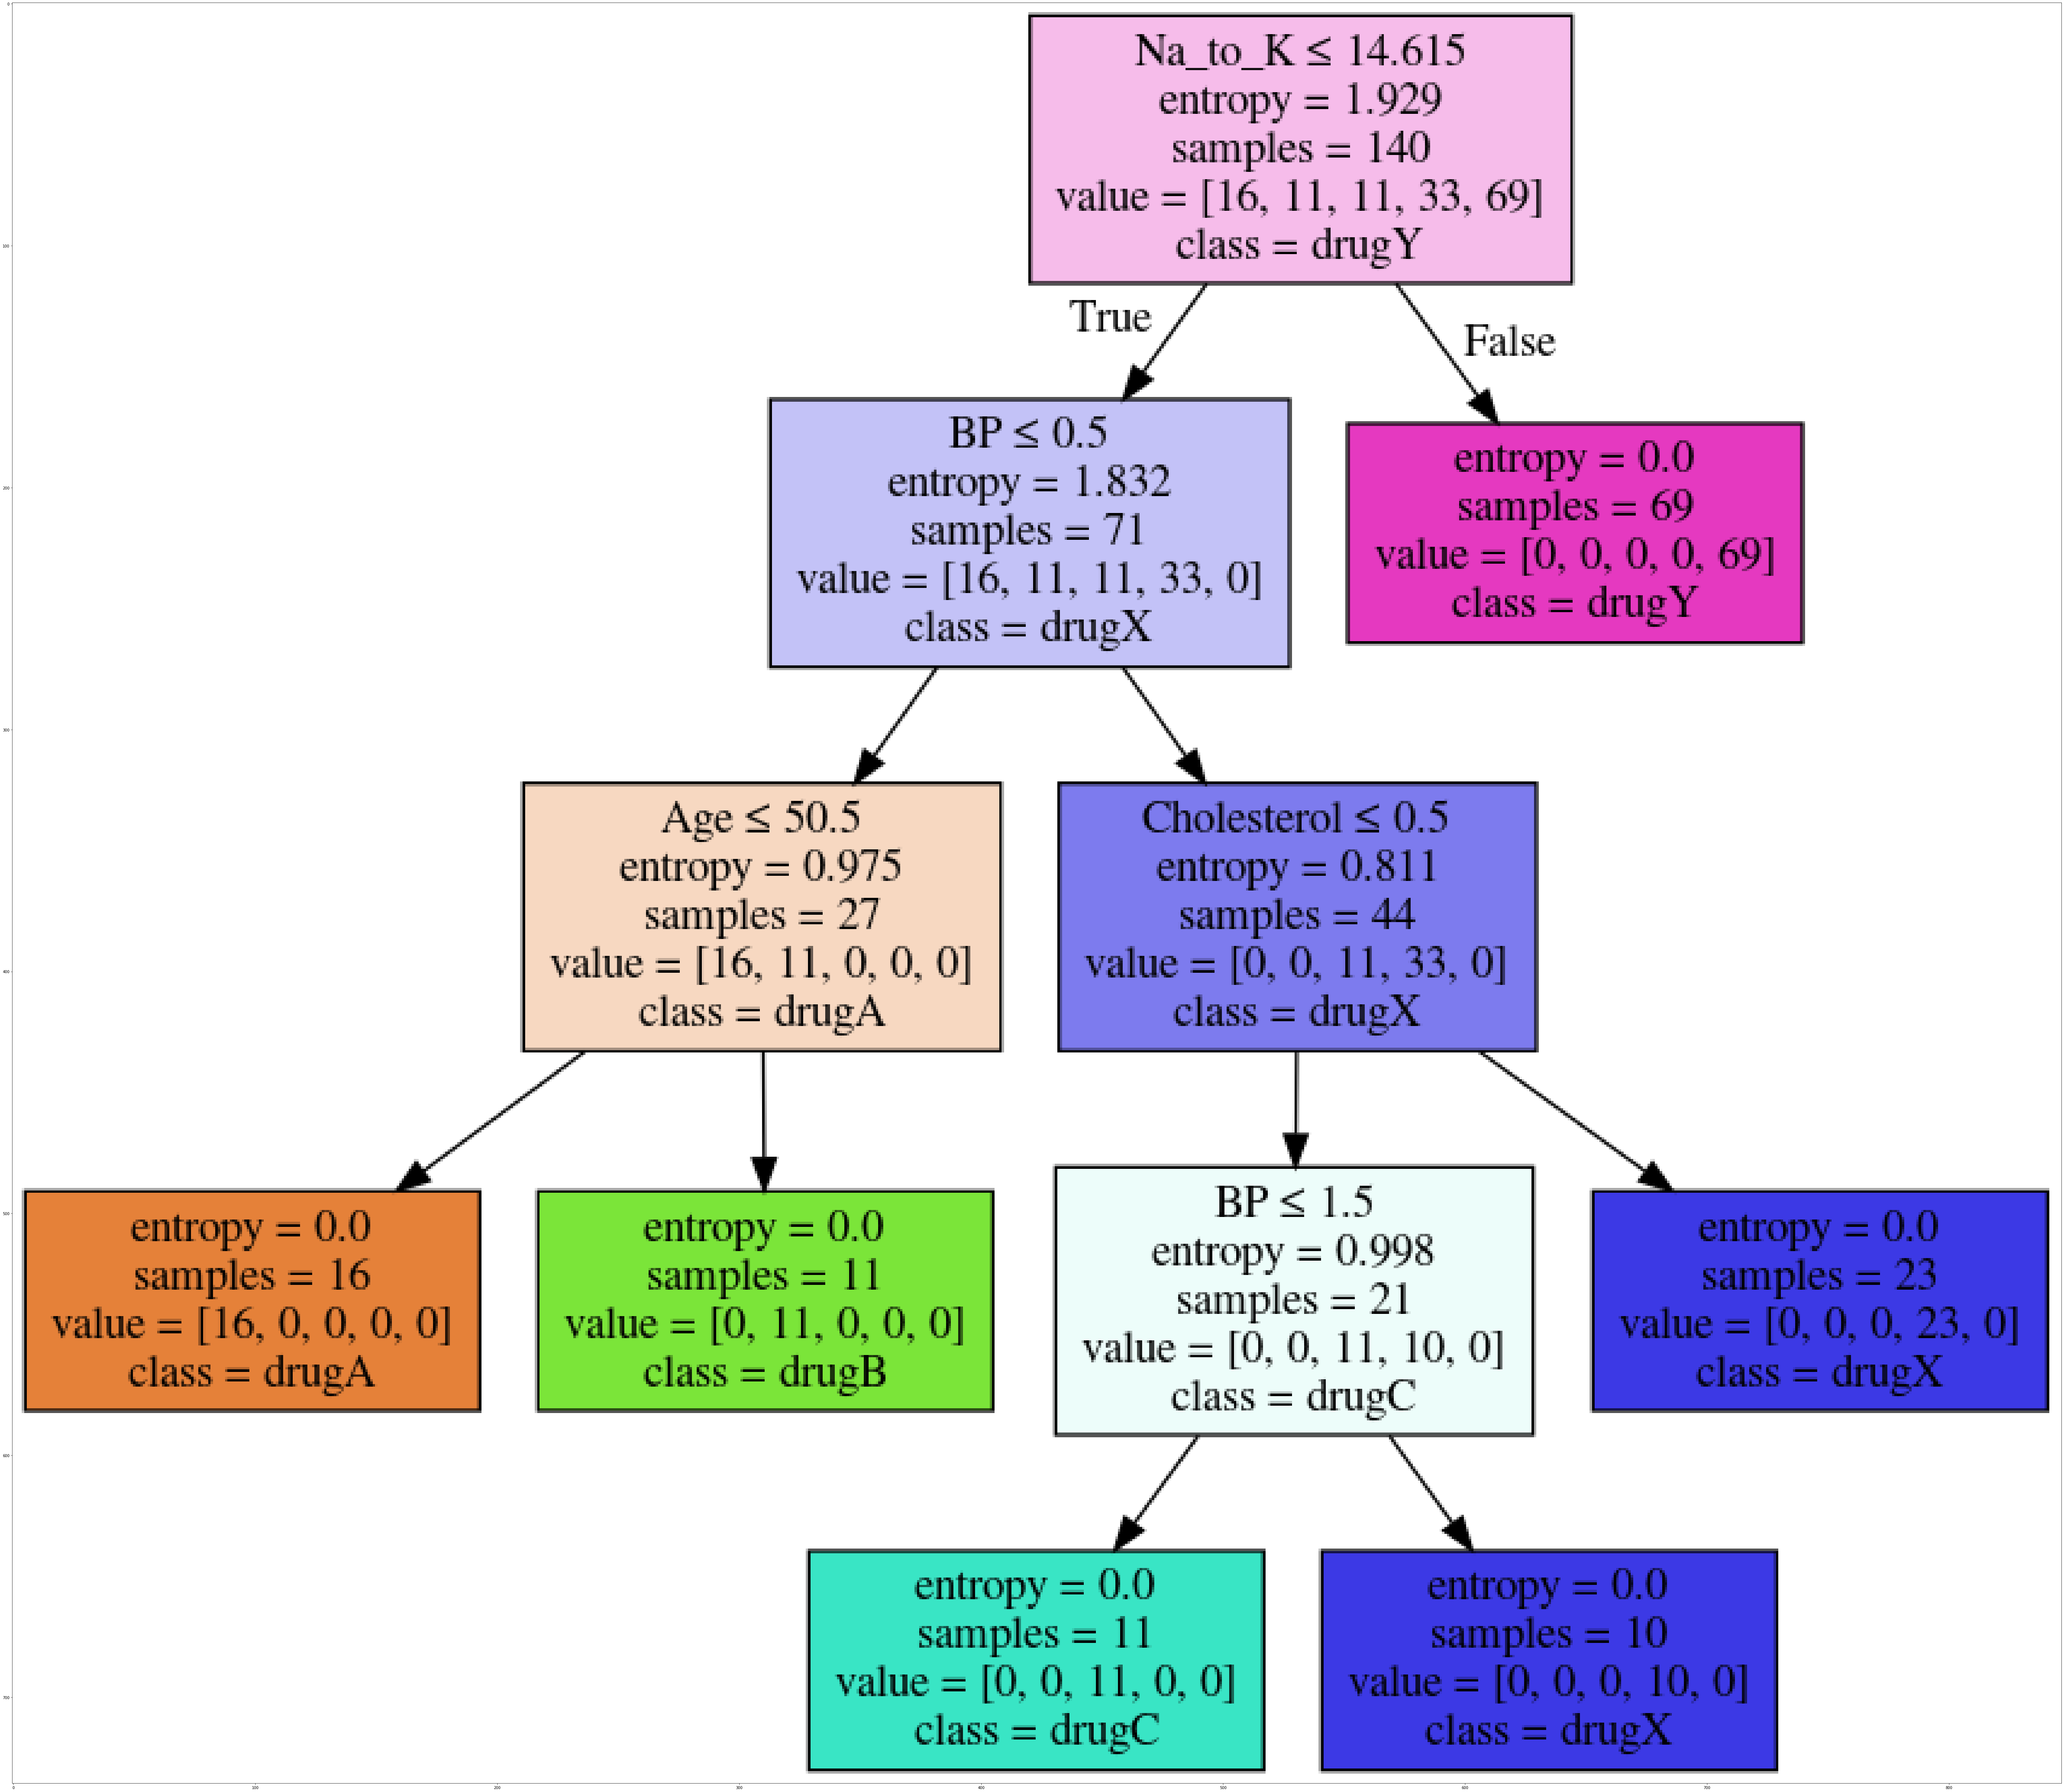

In [23]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')